In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()[0]
recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d')
recent_date

datetime.datetime(2017, 8, 23, 0, 0)

In [14]:
# Calculate the date one year from the last date in data set.
one_year = recent_date - dt.timedelta(days=365)
one_year

datetime.datetime(2016, 8, 23, 0, 0)

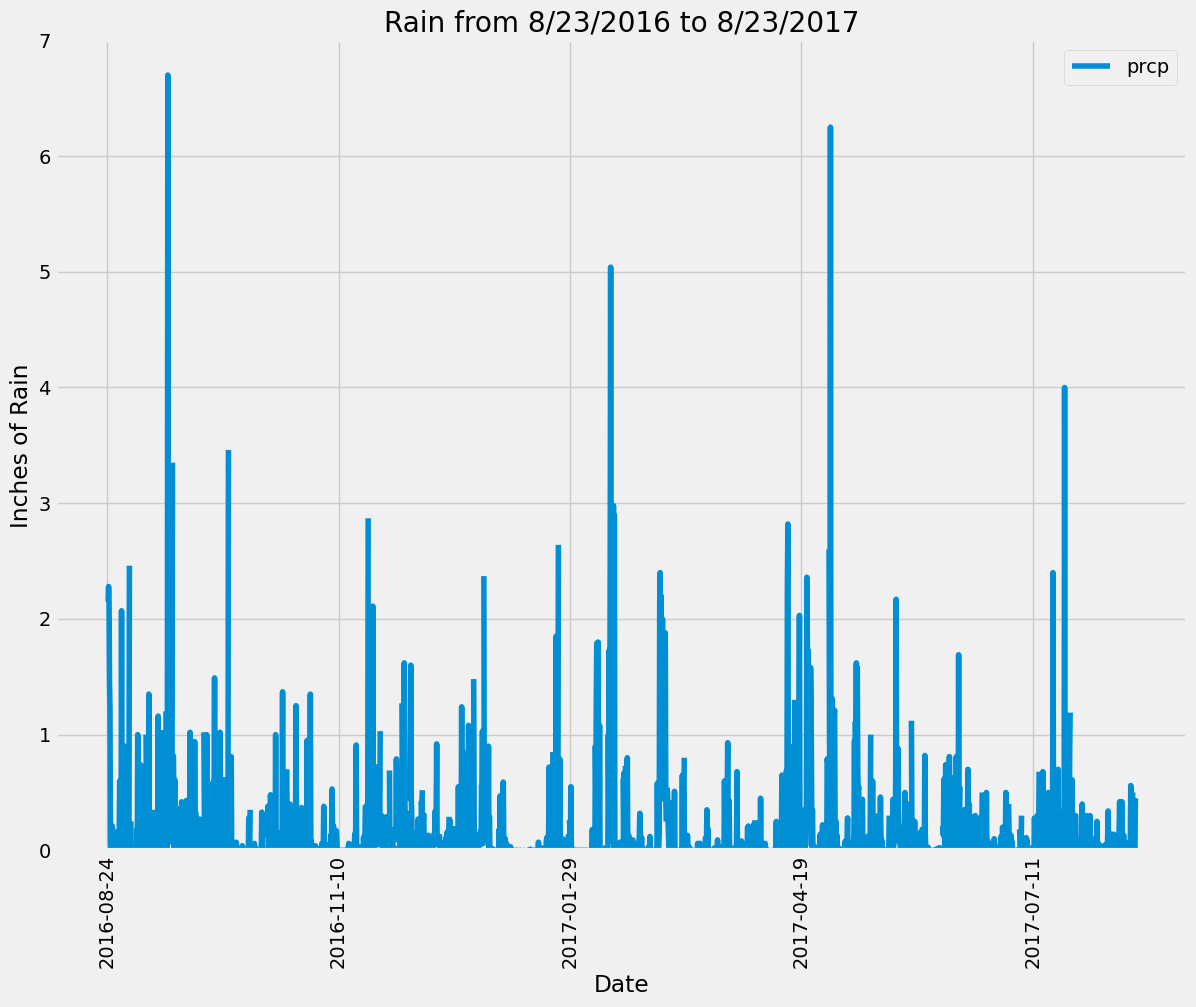

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Perform a query to retrieve the data and precipitation scores
rain_data = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > one_year).\
filter(Measurement.date < recent_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(rain_data).set_index("date")

# Sort the dataframe by date
rain_df = rain_df.sort_values(by="date")
rain_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(figsize = (13,10), title = "Rain from 8/23/2016 to 8/23/2017")
plt.ylabel("Inches of Rain")
plt.ylim(0,7)
plt.xlabel("Date")
plt.xticks(rotation="vertical")
plt.grid(True)

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()
station_count

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_ids = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(desc(func.count(Measurement.station))).all()

station_ids

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
low_temp = session.query(Measurement.station, func.min(Measurement.tobs)).\
        filter(Measurement.station == "USC00519281").\
        group_by(Measurement.station).all()

high_temp = session.query(Measurement.station, func.max(Measurement.tobs)).\
        filter(Measurement.station == "USC00519281").\
        group_by(Measurement.station).all()

avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
        filter(Measurement.station == "USC00519281").\
        group_by(Measurement.station).all()

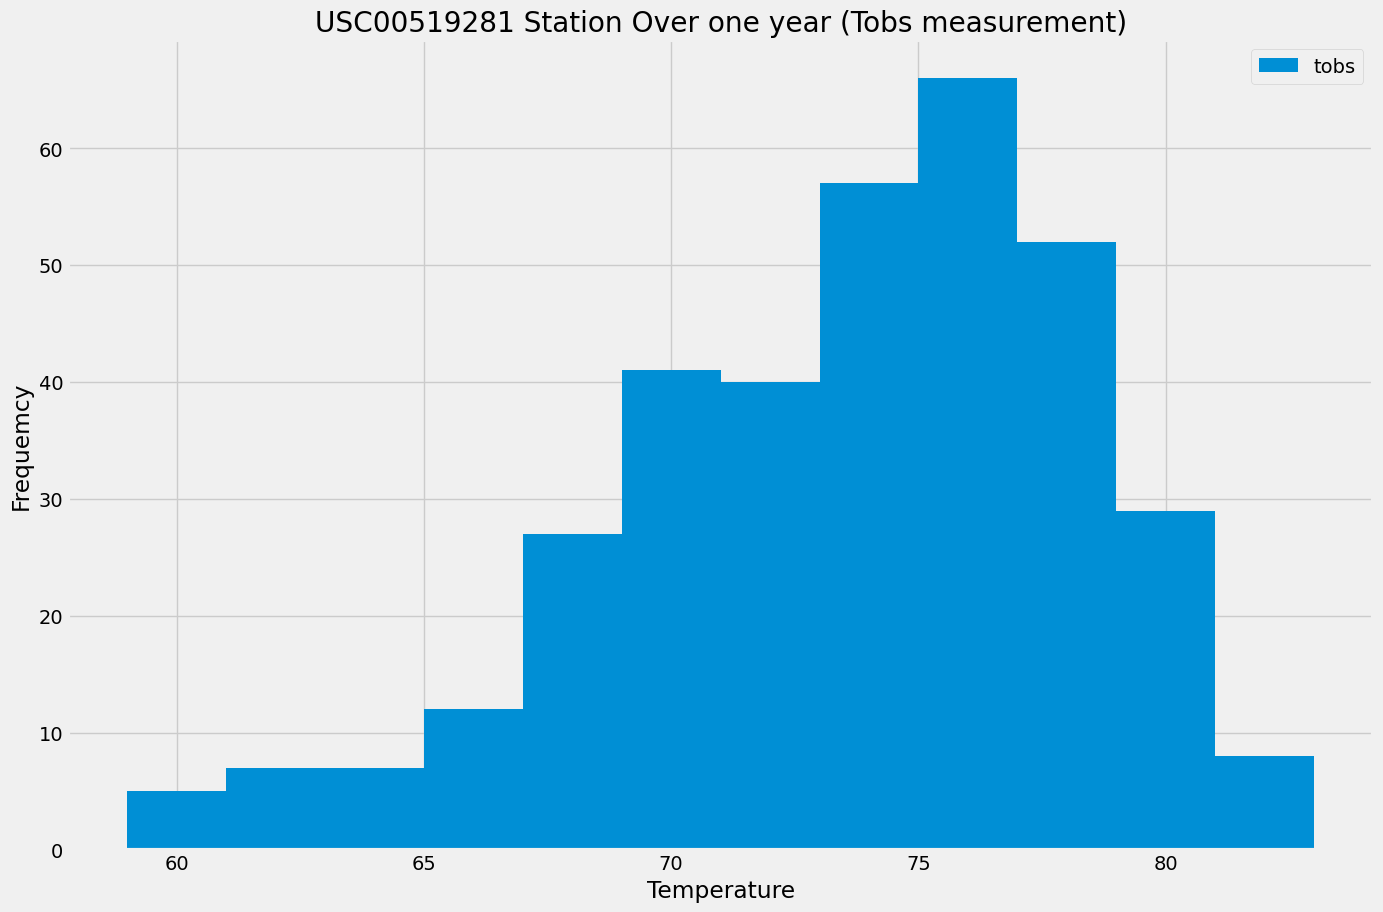

In [27]:
#Plotting data on histogram
active_station_tobs = session.query(Measurement.tobs).\
            filter(Measurement.station == "USC00519281").\
            filter(Measurement.date > one_year).\
            filter(Measurement.date < recent_date).all()

# DF
active_station_tobs_df = pd.DataFrame(active_station_tobs)

active_station_tobs_df.plot(kind="hist", bins=12, figsize=(15,10), title="USC00519281 Station Over one year (Tobs measurement)")
plt.ylabel("Frequemcy")
plt.xlabel("Temperature")
plt.grid(True)

# Close Session

In [16]:
# Close Session
session.close()